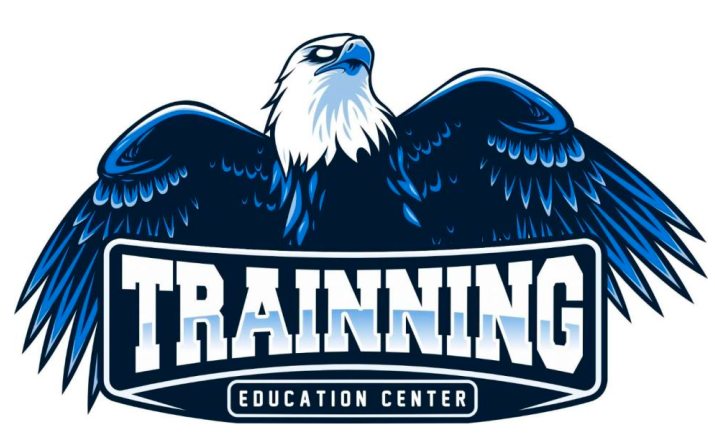

# Python aplicado a Big Data
## Dia 1 - 04/03/2021
### Instrutor: Leonardo Galler


### Introdução ao matplotlib

In [ ]:
# Se não estiver instalado utilize esta célula para instalar
## Se estiver utilizando Conda
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: ...working... done

# All requested packages already installed.



### Importando os pacotes que vamos precisar

In [16]:
# Matplotlib é a biblioteca, pyplot é um pacote que inclui todas as 
#  funções MATLAB para usar funções MATLAB em Python.
import numpy as np
#import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Começando pelo básico. Métodos de matplotlib.pyplot
Os **kwargs** são [propriedades](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib-lines-line2d) "Line2D"
<br><br>[Interface pyplot] (https://matplotlib.org/stable/api/pyplot_summary.html)  Seus métodos
<br>[Classe matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) Métodos para plotagem de linhas da classe Line2D

## Exemplos de gráficos
### Usando Matplotlib


### Gráfico de barras
**Utilização:** Boa escolha quando for bom evidenciar as diferenças entre grupos particulares de itens.<br>
[Parâmetros](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib-axes-axes-plot) de plotagem de axes<br>
[** kwargs](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

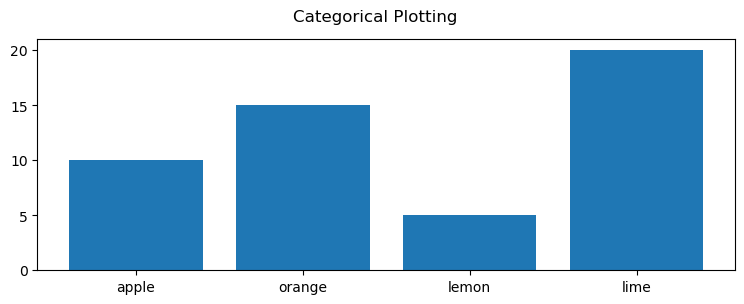

In [2]:
# Exemplo 1 - Gráfico de barras simples
import matplotlib.pyplot as plt

data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(figsize=(9, 3)) # A função subplot cria uma figura e um ou mais eixos.
                                        # O parâmetro figsize define o tamanho da figura. 9 é a largura e 3 é a altura.
axs.bar(names, values)
fig.suptitle('Categorical Plotting')  
plt.show()

Executando. Aguarde...


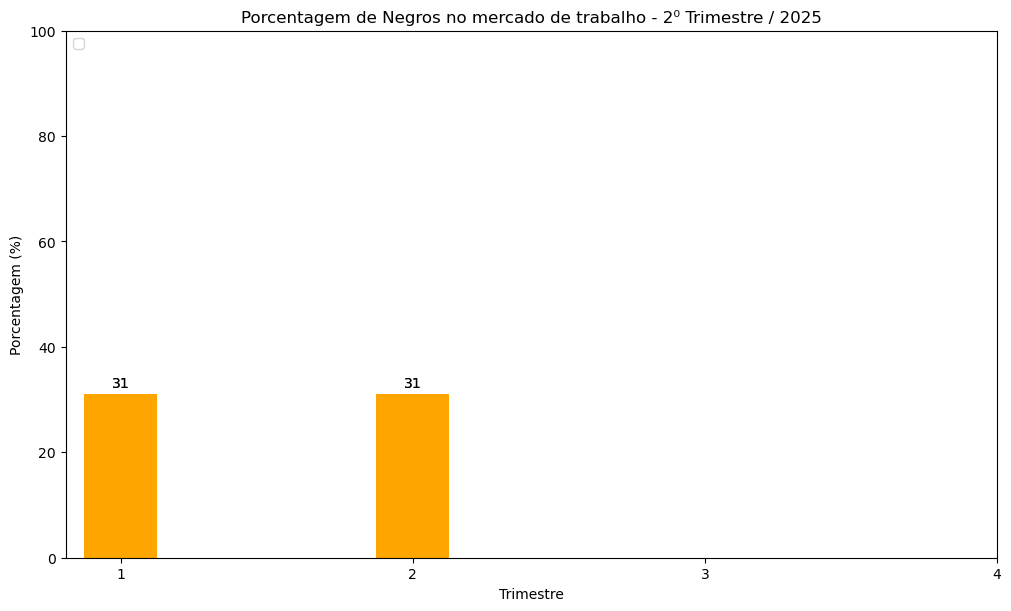

In [1]:
# Exemplo 2 - Outro exemplo de gráfico de barras simples
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from pandas import read_excel, concat
from time import localtime
from re import search
import warnings

warnings.filterwarnings(action='ignore',category=UserWarning)

def le_planilha():
    
    lista = listdir(path='.')
    
    resultado = [item for item in lista if search(r'tabela_negros.*.xlsx', item)]
    #print(resultado)
    
    i = 0
    for p in resultado:
        if i == 0:
            df = read_excel(p) # A PLANILHA DEVE VIR COM UMA COLUNA PARA O TRIMESTRE/ANO. 
                               # NECESSÁRIO ADICIONAR.
            i += 1
        else:
            df = concat([df,read_excel(p)],axis=0)        
    
    #df.to_excel('tabela_negros_final.xlsx',index=False)

    return df


def tratando_dados(df):

    #print(df)
    
    porcentagemN = [x for x in df['PERCENTUAL'].values]
    trimestre = [x for x in df['TRIMESTRE'].values]
    ano = [x for x in df['ANO'].values]

    listadicionario = []

    # CRIAR UMA LISTA DE DICIONARIOS
    x = np.arange(len(trimestre))  # Cria uma sequência de valores de 0 a len(species) para o eixo x
    for i in x:
        listadicionario.append({'Negros': porcentagemN[i], 'Trimestre':trimestre[i],'Ano':ano[i]})

    return listadicionario


def gera_grafico(listadicionario):

    data = f'{str(localtime().tm_mday).zfill(2)}{str(localtime().tm_mon).zfill(2)}{localtime().tm_year}{str(localtime().tm_hour).zfill(2)}{str(localtime().tm_min).zfill(2)}{str(localtime().tm_sec).zfill(2)}'
    
    # Extrair porcentagens para Homens, Mulheres e Cargos
    negros = [int(item['Negros'].strip('%')) for item in listadicionario]
    trimestre = [item['Trimestre'] for item in listadicionario]
    ano = [item['Ano'] for item in listadicionario]

    width = 0.25  # the width of the bars
    
    x = np.arange(len(trimestre))  # Cria uma sequência de valores de 0 a len(species)

    fig, ax = plt.subplots(layout='constrained',figsize=(10,6))

    # Barras    
    for t in x:
        rects = ax.bar(t+1, negros, width,color='orange')
        ax.bar_label(rects, padding=3)
        
    #rects2 = ax.bar(x + width/2, mulheres, width)

    # Configurações para os eixos
    ax.set_ylabel('Porcentagem (%)')
    ax.set_title(f'Porcentagem de Negros no mercado de trabalho - {trimestre[-1]}⁰ Trimestre / {ano[0]}')
    ax.set_xticks([1,2,3,4])
    ax.set_xticklabels(['1','2','3','4'])
    ax.set_xlabel('Trimestre')
    ax.legend(loc='upper left', ncols=3)

    # Adicionar labels nas barras
    
    #ax.bar_label(rects2, padding=3)

    # Define o limite do eixo y comum, para ser utilizado por todas as barras (exemplo: 0 a 100%). Utilizando também o mesmo ax.
    ax.set_ylim(0, 100)

    plt.savefig(f'negros no mercado de trabalho_{data}.png') # Salva no diretório do notebook
    

if __name__ == "__main__":
    
    print('Executando. Aguarde...')
    
    df = le_planilha()
    listadict = tratando_dados(df)
    #print(listadict)        
    gera_grafico(listadict)


In [ ]:
# Exemplo 3 - Gráfico de barras empilhado
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
# Exemplo 4 - Outro exemplo de gráfico de barras empilhado 
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_excel

In [2]:
def le_planilha():
    df = read_excel('mulheres_cargos_lideranca.xlsx') # A PLANILHA DEVE VIR COM UMA COLUNA PARA O TRIMESTRE/ANO. 
                                                      # NECESSÁRIO ADICIONAR.
                                                          
    return df

In [3]:
def tratando_dados(df):
    
    cargos = [x for x in df['CARGO'].values]
    porcentagemH = [x for x in df['% H'].values]
    porcentagemM = [x for x in df['% M'].values]
    trimestre = [x for x in df['TRIMESTRE'].values]
    ano = [x for x in df['ANO'].values]
    
    x = np.arange(len(cargos))  # Cria uma sequência de valores de 0 a len(species)
    
    # CRIAR UMA LISTA DE DICIONARIOS
    listadicionario = []
    
    for i in x:
        listadicionario.append({'Homens': porcentagemH[i], 'Mulheres': porcentagemM[i], 'Cargo': cargos[i],'Trimestre':trimestre[i],'Ano':ano[i]})
    
    return listadicionario

In [5]:
def gera_grafico(listadicionario):
    
    # Extrair dados para Homens, Mulheres e Cargos
    homens = [int(item['Homens'].strip('%')) for item in listadicionario]
    mulheres = [int(item['Mulheres'].strip('%')) for item in listadicionario]
    cargos = [item['Cargo'] for item in listadicionario]
    trimestre = [item['Trimestre'] for item in listadicionario]
    ano = [item['Ano'] for item in listadicionario]
        
    width = 0.25  # the width of the bars
    x = np.arange(len(cargos))  # Cria uma sequência de valores de 0 a len(species)
    
    fig, ax = plt.subplots(layout='constrained',figsize=(10,6))
    
    # Barras para Homens e Mulheres lado a lado
    rects1 = ax.bar(x - width/2, homens, width, label='Homens')
    rects2 = ax.bar(x + width/2, mulheres, width, label='Mulheres')
    
    
    # Configurações para os eixos
    ax.set_ylabel('Porcentagem (%)')
    ax.set_title(f'Porcentagem de Homens e Mulheres em cargos de liderança - {trimestre[0]}⁰ Trimestre / {ano[0]}')
    ax.set_xticks(x)
    ax.set_xticklabels(cargos)
    ax.legend(loc='upper left', ncols=3)
    
    # Adicionar labels nas barras
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    
    # Define o limite do eixo y para cobrir todas as barras (exemplo: 0 a 100%)
    ax.set_ylim(0, 100)
    
    plt.savefig('mulheres no cargo de liderança.png') # Salva no diretório do notebook
    #plt.show()


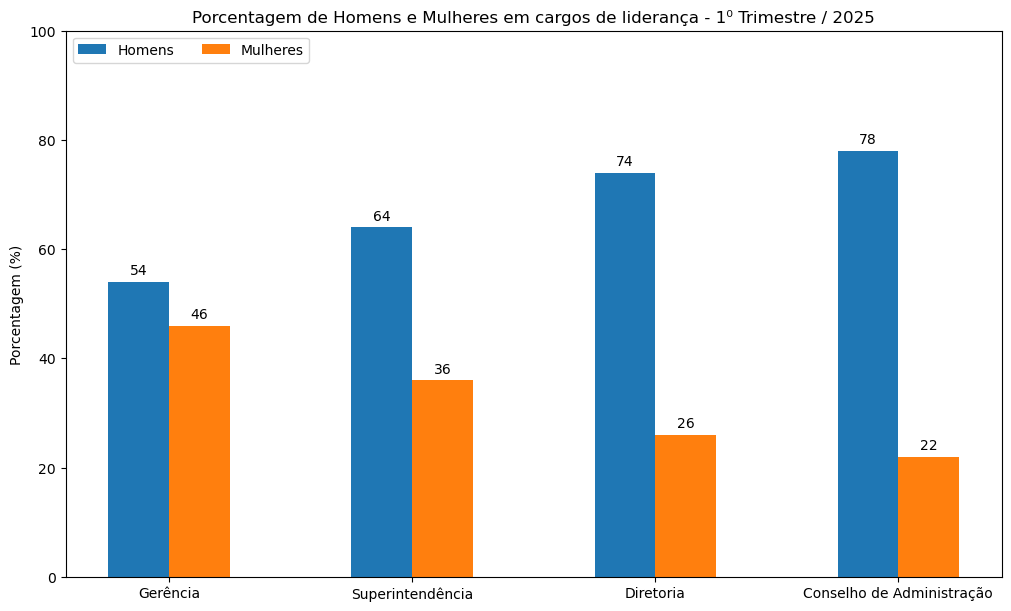

In [7]:
if __name__ == "__main__":
        
    df = le_planilha()
    listadict = tratando_dados(df)        
    gera_grafico(listadict)

### Salvando a figura
[Método savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig)

matplotlib.pyplot.savefig(*args, **kwargs)

Call signature:

savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

In [ ]:
import matplotlib.pyplot as plt

ypoints = [0.2, 0.4, 0.6, 0.68]
colors = ['b','k','y', 'm']

for p, c in zip(ypoints, colors):
    plt.axhline(p,  label='line: {}'.format(p), color=c)

plt.savefig('horizontal_lines.png') # Salva no diretório do notebook

plt.legend()
plt.show()

### Contorno e Pcolormesh
**Utilização:** representar uma matriz bidimensional em cores mesmo se as dimensões estiverem espaçadas de forma desigual. <br>
[Parâmetros](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib-pyplot-contour) de contorno.<br>
[Parâmetros](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html#numpy.meshgrid) da função meshgrid do numpy

Text(0.5, 1.0, 'Simplest contour with labels')

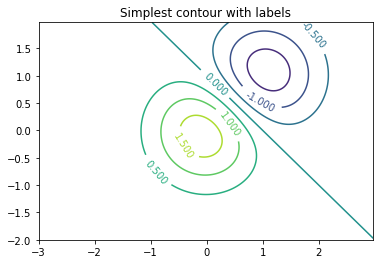

In [11]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y) # é obrigatório
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest contour with labels')

Text(0.5, 1.0, 'pcolormesh grids and shading')

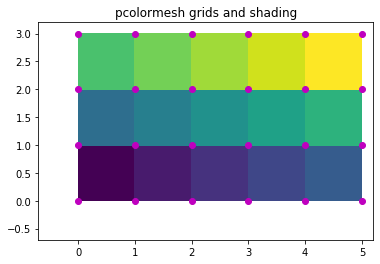

In [12]:
# Pcolormesh
nrows = 3
ncols = 5
Z = np.arange(nrows * ncols).reshape(nrows, ncols)
x = np.arange(ncols + 1)
y = np.arange(nrows + 1)

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, shading='flat', vmin=Z.min(), vmax=Z.max())


def _annotate(ax, x, y, title):
    # this all gets repeated below:
    X, Y = np.meshgrid(x, y)
    ax.plot(X.flat, Y.flat, 'o', color='m')
    ax.set_xlim(-0.7, 5.2)
    ax.set_ylim(-0.7, 3.2)
    ax.set_title(title)

_annotate(ax, x, y, "shading='flat'")
ax.set_title('pcolormesh grids and shading')

### Histogramas
**Utilização:** Explorar visualmente como os valores são distribuídos

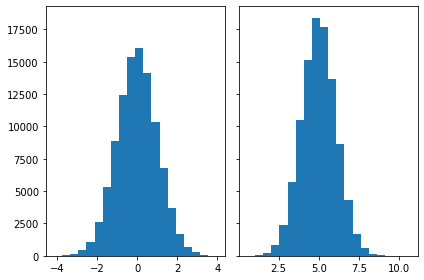

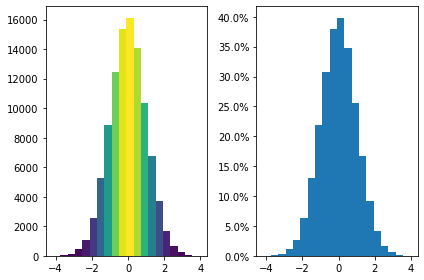

In [14]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

### Histograma 2D

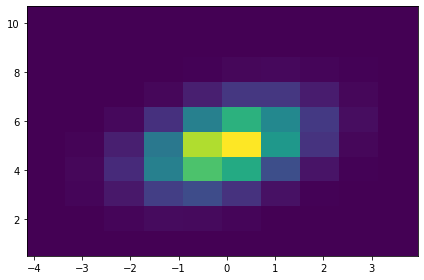

In [15]:
# Utilizando os valores anteriores
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

## [Paths](https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html#path-tutorial)
**Utilização:** Retornar caminhos arbitrários.

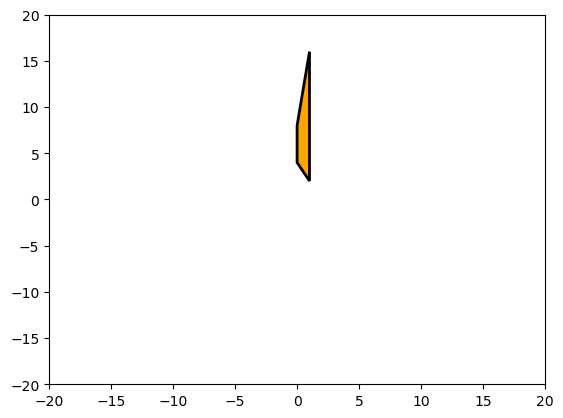

In [3]:
from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
    # Faça sua arte
   (0., 8.),  # left, bottom
   (0., 4.),  # left, top
   (1., 2.),  # right, top
   (1., 16.),  # right, bottom
   (0., 9.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
plt.show()

## [Streamplot](https://matplotlib.org/stable/gallery/images_contours_and_fields/plot_streamplot.html#streamplot)
**Utilização:** Podemos usar a função streamplot () para traçar as linhas de fluxo de um vetor. Também podemos mapear as cores e a largura dos diferentes parâmetros, como velocidade, tempo etc.

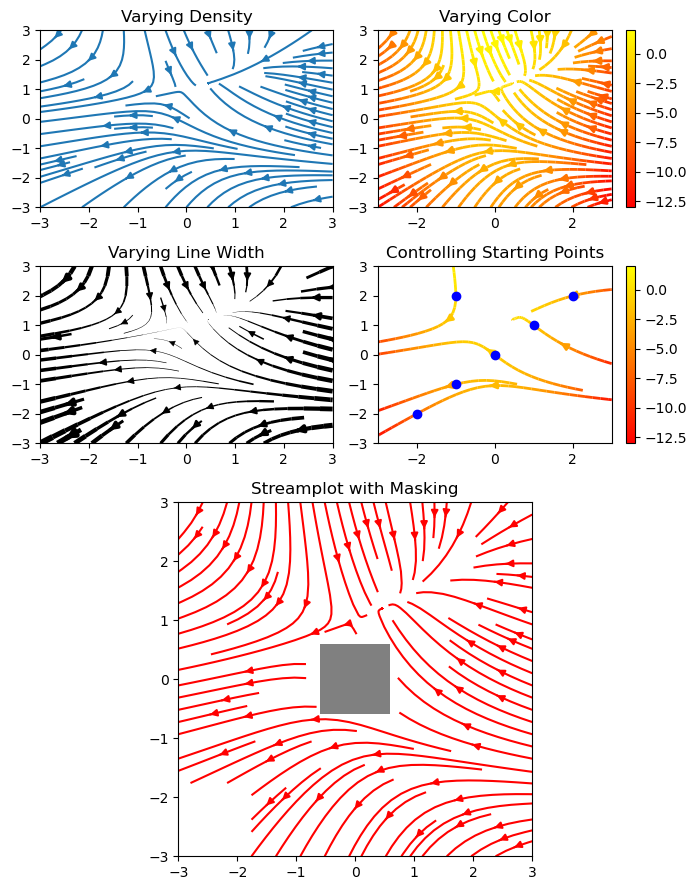

In [5]:
import matplotlib.gridspec as gridspec
import numpy as np

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5, cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()

### Gráfico de linha
**Utilização:** Utilizado para evidenciar tendências.<br>
<br>[Métodos Numpy - Numerical Python](https://numpy.org/doc/stable/reference/routines.math.html#trigonometric-functions) Funções Trigonométricas
<br>[Métodos Numpy - Numerical Python](https://numpy.org/doc/stable/reference/routines.array-creation.html#numerical-ranges) Criação de arrays - Intervalos numéricos



### Linha Vertical
matplotlib.pyplot.axvline(xinicial, ymin=0, ymax=1, **kwargs). Retorna um objeto Line2D

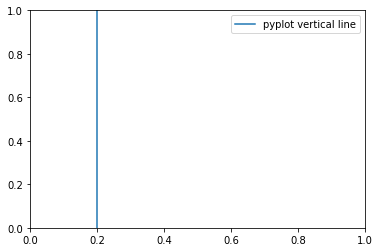

In [11]:
import matplotlib.pyplot as plt

xpoints = 0.2
plt.axvline ( xpoints , 0 , 1 , label = 'pyplot vertical line')

plt.legend () # Exibe o label
plt.show () # Exibe o gráfico

### Linha Horizontal
matplotlib.pyplot.axhline(yinicial, xmin=0, xmax=1, **kwargs). Retorna um objeto Line2D

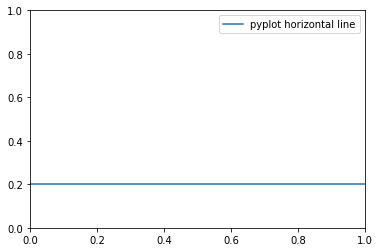

In [18]:
import matplotlib.pyplot as plt

ypoints = 0.2
plt.axhline (ypoints, 0 , 1 , label = 'pyplot horizontal line' )
plt.legend ()
plt.show ()

### Múltiplas linhas
Para plotar várias linhas verticais, podemos criar uma matriz de "X" pontos/coordenadas e, em seguida, iterar em cada elemento da matriz para plotar mais de uma linha.


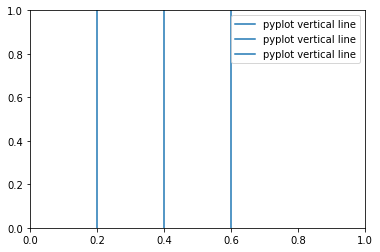

In [25]:
import matplotlib.pyplot as plt

xpoints = [ 0.2 , 0.4 , 0.6 ]

for p in xpoints:
    plt.axvline (p, label = 'pyplot vertical line' )
    
plt.legend ()
plt.show ()

### The zip() function 
 
Returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)

#use the tuple() function to display a readable version of the result:

print(tuple(x))

Saída: 
(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))

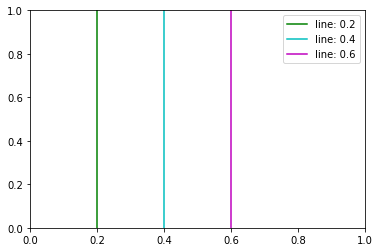

In [28]:
# Agora com cores, para ajudar na identificação de cada linha
import matplotlib.pyplot as plt

xpoints = [0.2, 0.4, 0.6]
colors = ['g', 'c', 'm'] # Gray, Ciano, Magenta

param = zip(xpoints, colors)

for p, c in param:
    plt.axvline(p,  label='line: {}'.format(p), color=c)

plt.legend()
plt.show()

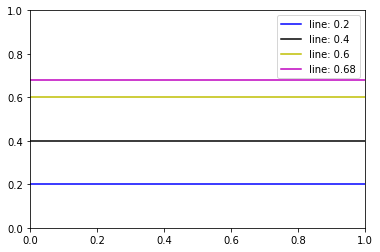

In [21]:
# Utilizando linhas horizontais
import matplotlib.pyplot as plt

ypoints = [0.2, 0.4, 0.6, 0.68]
colors = ['b', 'k', 'y', 'm']

for p, c in zip(ypoints, colors):
    plt.axhline(p,  label='line: {}'.format(p), color=c)

plt.legend()
plt.show()

### plot() e subplots()

<br>[Método subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots) para poder criar vários plotagens em uma. Classe Pyplot

Retorna uma figura e os eixos. Recomendável usar quando se precisa fazer modificações nos eixos ou na figura, usando suas propriedades. Ex: set_ylim, set_yticks, suptitle (na figura)

Na hora de se adicionar os plots a figura, semelhante a subplot, só que em vez de passar índice, usa-se uma matriz de eixos retornada de subplots()

#### subplots(3, 1, sharex=True). 
[Método Plot e seus parâmetros](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib-axes-axes-plot) para plotagem de eixos da classe matplotlib.axes.Axes. Devolve um objeto Line2D

Tamanho de x: 500 elementos
[ 0.          0.02004008  0.04008016  0.06012024  0.08016032  0.1002004
  0.12024048  0.14028056  0.16032064  0.18036072  0.2004008   0.22044088
  0.24048096  0.26052104  0.28056112  0.3006012   0.32064128  0.34068136
  0.36072144  0.38076152  0.4008016   0.42084168  0.44088176  0.46092184
  0.48096192  0.501002    0.52104208  0.54108216  0.56112224  0.58116232
  0.6012024   0.62124248  0.64128257  0.66132265  0.68136273  0.70140281
  0.72144289  0.74148297  0.76152305  0.78156313  0.80160321  0.82164329
  0.84168337  0.86172345  0.88176353  0.90180361  0.92184369  0.94188377
  0.96192385  0.98196393  1.00200401  1.02204409  1.04208417  1.06212425
  1.08216433  1.10220441  1.12224449  1.14228457  1.16232465  1.18236473
  1.20240481  1.22244489  1.24248497  1.26252505  1.28256513  1.30260521
  1.32264529  1.34268537  1.36272545  1.38276553  1.40280561  1.42284569
  1.44288577  1.46292585  1.48296593  1.50300601  1.52304609  1.54308617
  1.56312625  1.58316633

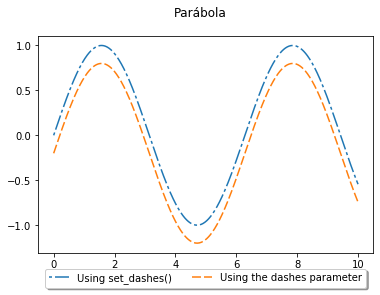

In [24]:
import numpy as np
import matplotlib.pyplot as plt

'''
    Return evenly spaced numbers over a specified interval
'''
x = np.linspace(0, 10, 500) # Semelhante a np.arange, a diferença é que se especifica                              # a quantidade de valores, não os limites.
                            # linspace(start, stop[, num, endpoint, …])

print("Tamanho de x: " + str(len(x)) + " elementos")
print(x) # x é um array

y = np.sin(x) # Calcula o seno para cada item do array

fig, ax = plt.subplots() # Retorna uma figura e os eixos. Método de classe matplotlib.pyplot

fig.suptitle("Parábola") # Modificação na figura. Adicionando um título

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Using set_dashes()') # Método plot da classe matplotlib.axe.Axes que retorna um Line2D (<class 'matplotlib.lines.Line2D'>)
print(type(line1))

'''
    Parâmetros de plotagem de linhas
'''
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using dashes parameter
# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show() # Mostra o gráfico

### Subplots adjacentes -> Compartilhando o mesmo eixo x entre os plots na figura
#### Remove horizontal space between axes na figura
subplots_adjust(hspace=0)

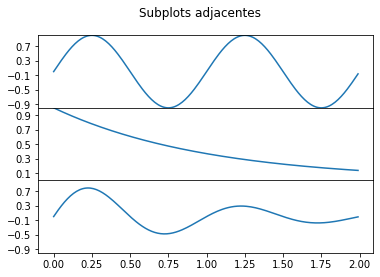

In [23]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(start=0.0, stop=2.0, step=0.01)
# A função arange NumPy retorna valores numéricos espaçados uniformemente dentro de um intervalo, armazenados como uma matriz NumPy (ou seja, um objeto ndarray).

s1 = np.sin(2 * np.pi * t) # np.pi -> Constante do Numpy (https://numpy.org/doc/stable/reference/constants.html)

s2 = np.exp(-t)
s3 = s1 * s2

# Usando subplots em vez de subplot
fig, axs = plt.subplots(3, 1, sharex=True) # sharex = True. Compartilhando o mesmo eixo x entre as figuras. Retornando uma figura e uma matriz de eixos.

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.suptitle("Subplots adjacentes")

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1) # Adicionando o primeiro plot a subplots()
axs[0].set_yticks(np.arange(start=-0.9, stop=1.0, step=0.4)) # Setando a distribuição dos valores na escala y
axs[0].set_ylim(-1, 1) # Setando os valores limites da escala y. A outra maneira é usando as funções xlim e ylim de pyplot

axs[1].plot(t, s2) # Adicionando o segundo plot a subplots()
axs[1].set_yticks(np.arange(start=0.1, stop=1.0, step=0.2))
axs[1].set_ylim(0, 1)

axs[2].plot(t, s3) # Adicionando o terceiro plot a subplots()
axs[2].set_yticks(np.arange(start=-0.9, stop=1.0, step=0.4))
axs[2].set_ylim(-1, 1)

plt.show()

### Axis range

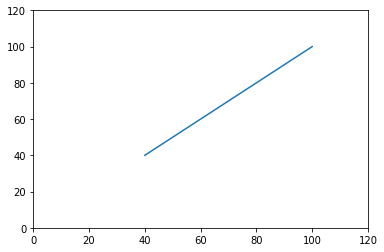

In [26]:
import matplotlib.pyplot as plt 

# É possivel definir o intervalo ou limite dos eixos ‘x’ e ‘y’ usando as funções xlim () e ylim () do pyplot.
x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x1, y1)
#plt.xlim([0,160])
plt.xlim([0,120])
#plt.ylim([0,150])
plt.ylim([0,120])
plt.show()

### Label axis

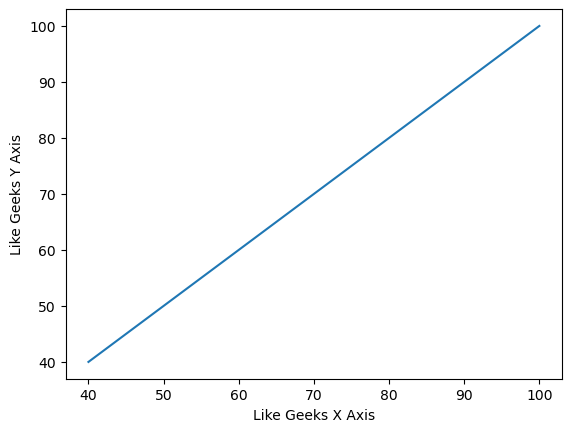

In [8]:
import matplotlib.pyplot as plt

# Você pode criar os rótulos para os eixos ‘x’ e ‘y’ usando as funções xlabel () e ylabel () do pyplot
# sintaxe = matplotlib.pyplot.xlabel(labeltext, labelfontdict, *kwargs)
# sintaxe = matplotlib.pyplot.ylabel(labeltext, labelfontdict, *kwargs)

# Limpar o plot, quando é necessário limpar todos os parâmetros já configurados para gerar outro plot
# sintaxe = matplotlib.pyplot.clf() 
## Esta função não recebe parâmetros

x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x1, y1)
plt.xlabel('Like Geeks X Axis')
plt.ylabel('Like Geeks Y Axis')
#plt.clf()
plt.show()

### Plots Múltiplos Usando subplot()
Os **kwargs** são [propriedades](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib-lines-line2d) "Line2D"
<br><br>[Método subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot). Você pode gerar vários gráficos na mesma figura com a ajuda da função subplot(), depois passando cada função plot() ao objeto pyplot
<br><br>Call signatures:

#### subplot(nrows, ncols, index, **kwargs)

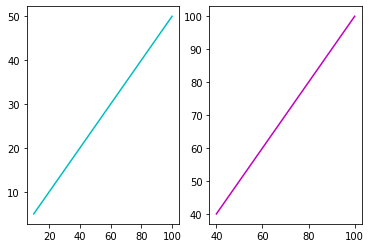

In [18]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1) # número de linhas da figura que conterá os gráficos, número de colunas da figura que conterá os gráficos, posição do gráfico

x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.plot(x1, y1, color = "c") # Para plotar qualquer tipo de gráfico passando uma matriz x e uma matriz y

plt.subplot(1, 2, 2)

x2 = [40, 50, 60, 70, 80, 90, 100]
y2 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, y2, color = "m")

plt.show()


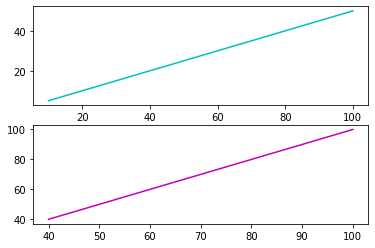

In [3]:
# Com 2 linhas
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
x1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y1 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.plot(x1, y1, color = "c")

plt.subplot(2, 1, 2)
x2 = [40, 50, 60, 70, 80, 90, 100]
y2 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, y2, color = "m")

plt.show()

### Grade de gráficos 2x2

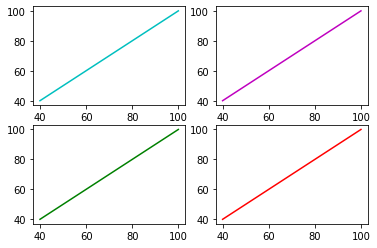

In [33]:
# Subplot 1
plt.subplot(2, 2, 1)
x1 = [40, 50, 60, 70, 80, 90, 100]
y1 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x1, y1, color = "c")

# Subplot 2
plt.subplot(2, 2, 2)
x2 = [40, 50, 60, 70, 80, 90, 100]
x2 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x2, y2, color = "m")

# Subplot 3
plt.subplot(2, 2, 3)
x3 = [40, 50, 60, 70, 80, 90, 100]
y3 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x3, y3, color = "g")

# Subplot 4
plt.subplot(2, 2, 4)
x4 = [40, 50, 60, 70, 80, 90, 100]
y4 = [40, 50, 60, 70, 80, 90, 100]
plt.plot(x4, y4, color = "r")
plt.show()

## Utilizando Seaborn para criar um mapa de calor
**Utilização:** Esta é uma ótima maneira de visualizar dados, pois pode mostrar a relação entre variáveis, incluindo o tempo.

<AxesSubplot:xlabel='year', ylabel='month'>

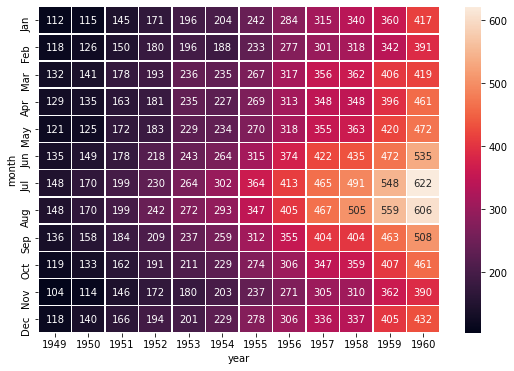

In [4]:
# Exemplo 2
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

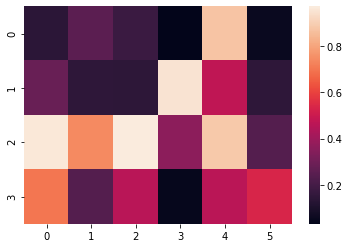

In [1]:
# Exemplo 3
## gerar uma matriz de números aleatórios entre um determinado intervalo, que será plotada como um mapa de calor.

import numpy as np
import seaborn as sns

data = np.random.rand(4, 6)

heat_map = sns.heatmap (data)

Text(33.0, 0.5, 'Values on Y axis')

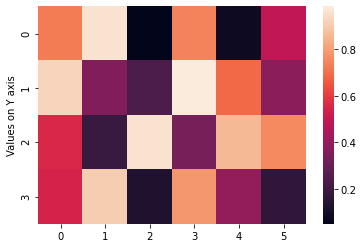

In [5]:
# adicionar um rótulo no eixo y usando o atributo ylabel
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data)
plt.ylabel('Values on Y axis')

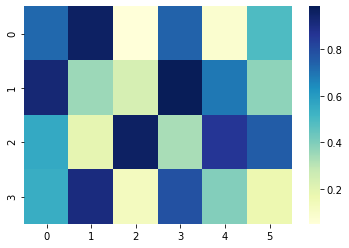

In [6]:
# alterar a cor do mapa de calor
heat_map = sns.heatmap(data, cmap="YlGnBu")

No mapa de calor Seaborn, temos três tipos diferentes de mapas de cores.
- Mapas de cores sequenciais (Sequential colormaps)
- Paleta de cores divergentes (Diverging color palette)
- Dados discretos (Discrete Data)

#### Mapa de cores sequencial (Sequential colormaps)
##### Paleta de cubo sequencial - Utilizando cubehelix

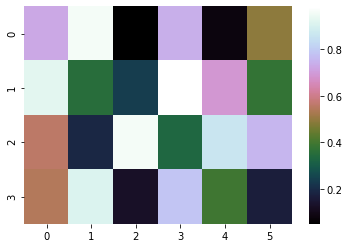

In [7]:
heat_map = sns.heatmap(data, cmap="cubehelix")

#### Mapa de cores divergentes
##### Paleta de cubo divergente

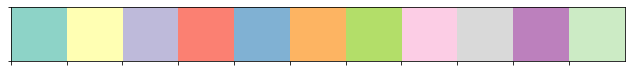

In [7]:
# O argumento 'Set3' é o nome da paleta e 11 é o número de cores discretas na paleta.
sns.palplot(sns.mpl_palette("Set3", 11))

<AxesSubplot:>

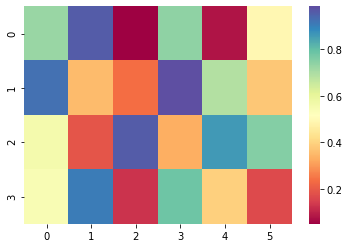

In [8]:
# Mais paletas divergentes
sns.heatmap(data, cmap="Spectral")

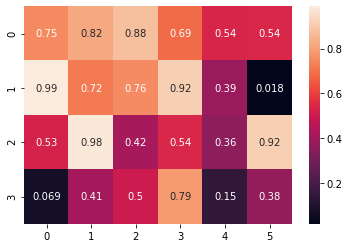

In [9]:
# Adicionar texto sobre o mapa de calor
data = np.random.rand(4, 6)
heat_map = sns.heatmap(data, annot=True)

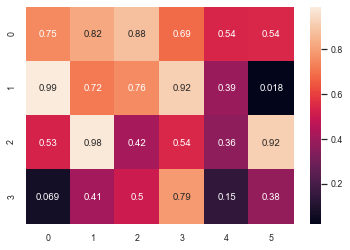

In [10]:
# Ajustar o tamanho da fonte do mapa de calor
sns.set(font_scale=0.8)
heat_map = sns.heatmap(data, annot=True)

In [ ]:
# Seaborn heatmap colorbar, por padrão ela sempre aparece, mas podemos desativar
sns.set(font_scale=1)
heat_map = sns.heatmap(data, annot=True, cbar=False)

In [ ]:
# adicionar um título a barra de cores
heat_map = sns.heatmap(data, annot=True, cbar_kws={'label': 'My Colorbar'})

In [ ]:
# No cbar_kws, temos que especificar a qual atributo da barra de cores estamos nos referindo.
## podemos mudar a orientação da cor, que por padrão é vertical.
heat_map = sns.heatmap(data, annot=True, cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})

In [ ]:
# Alterar o tamanho da fonte da barra de cores do mapa de calor
sns.set(font_scale=1.8)
heat_map = sns.heatmap(data, annot=True, cbar_kws={'label': 'My Colorbar', 'orientation': 'horizontal'})

In [ ]:
# Alterar a rotação do tick axis
## Para girá-los, primeiro obteremos os yticklabels do mapa de calor e, em seguida, definiremos a rotação como 0:
heat_map = sns.heatmap(data)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=35)

In [ ]:
# Adicionar texto e valores no mapa de calor
text = np.asarray([['a', 'b', 'c', 'd', 'e', 'f'], ['g', 'h', 'i', 'j', 'k', 'l'], ['m', 'n', 'o', 'p', 'q', 'r'], ['s', 't', 'u', 'v', 'w', 'x']])

# combinar o texto com os valores e adicionar o resultado ao mapa de calor como um rótulo
labels = (np.asarray(["{0}\n{1:.2f}".format(text,data) for text, data in zip(text.flatten(), data.flatten())])).reshape(4,6)

# adicionando labels no heatmap
sns.set(font_scale=1)
heat_map = sns.heatmap(data, annot=labels, fmt='')

### Fim por hoje!